In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#https://www.kaggle.com/datasets/arunavakrchakraborty/covid19-twitter-dataset?select=Covid-19+Twitter+Dataset+%28Aug-Sep+2020%29.csv
import pandas as pd
df=pd.read_csv('/content/drive/MyDrive/Covid19/Covid-19(Apr-Jun 2020).csv')
df = df.drop_duplicates()


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143903 entries, 0 to 143902
Data columns (total 17 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               143901 non-null  float64
 1   created_at       143902 non-null  object 
 2   source           143876 non-null  object 
 3   original_text    143902 non-null  object 
 4   lang             143902 non-null  object 
 5   favorite_count   143902 non-null  float64
 6   retweet_count    143902 non-null  float64
 7   original_author  143902 non-null  object 
 8   hashtags         28510 non-null   object 
 9   user_mentions    107332 non-null  object 
 10  place            105021 non-null  object 
 11  clean_tweet      143419 non-null  object 
 12  compound         143903 non-null  float64
 13  neg              143903 non-null  float64
 14  neu              143903 non-null  float64
 15  pos              143903 non-null  float64
 16  sentiment        143903 non-null  obje

In [ ]:
df=df[['original_text','sentiment']]
df=df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 143902 entries, 0 to 143902
Data columns (total 2 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   original_text  143902 non-null  object
 1   sentiment      143902 non-null  object
dtypes: object(2)
memory usage: 3.3+ MB


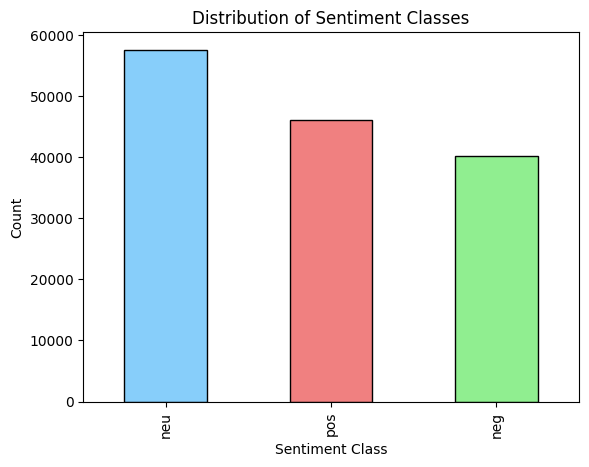

In [ ]:
import matplotlib.pyplot as plt

# Count sentiment classes
sentiment_counts = df["sentiment"].value_counts()

# Define colors for "blue light," "red light," and "green light"
colors = ["lightskyblue", "lightcoral", "lightgreen"]  # Light blue, light red, light green

# Plot
sentiment_counts.plot(kind="bar", color=colors, edgecolor="black")
plt.xlabel("Sentiment Class")
plt.ylabel("Count")
plt.title("Distribution of Sentiment Classes")
plt.show()


In [ ]:
df["text_length"] = df["original_text"].apply(lambda x: len(x.split()))
print(df["text_length"].describe())


count    143902.000000
mean         19.161902
std           4.571431
min           1.000000
25%          17.000000
50%          20.000000
75%          22.000000
max          33.000000
Name: text_length, dtype: float64


In [ ]:
import numpy as np
import pandas as pd
import torch
import os
import torch.nn as nn
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import transformers
import seaborn as sns
import matplotlib as plt
from transformers import AutoModel, BertTokenizerFast
os.environ["CUDA_LAUNCH_BLOCKING"] = "1"


In [ ]:
from nltk.corpus import stopwords, words
from nltk.tokenize import word_tokenize
import nltk
import re
import string
import pandas as pd
import numpy as np
from wordcloud import WordCloud
string.punctuation

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('words')
nltk.download('punkt_tab')
# Initialize stop words, English words corpus, and stemmer
stop_words = set(stopwords.words('english'))
english_words = set(words.words())
# stemmer = PorterStemmer()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [ ]:
stop_words = set(stopwords.words("english"))

def preprocess(text):
    text = text.lower()

    text = re.sub(r"@\w+", "", text)

    text = re.sub(r"#(\w+)", r"\1", text)

    text = re.sub(r"http\S+|www\S+", "", text)

    text = text.translate(str.maketrans("", "", string.punctuation))

    text = ''.join([i for i in text if not i.isdigit()])

    tokens = word_tokenize(text)

    tokens = [word for word in tokens if word not in stop_words]

    return ' '.join(tokens)

df['Cleantext'] = df['original_text'].apply(preprocess)



In [ ]:
X=df.Cleantext
Y=df.sentiment
X_train, X_temp, y_train, y_temp = train_test_split(X, Y, test_size=0.20, random_state=42)

# Further split temp into test and validation
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.50, random_state=42)
print(f'(X_train: {len(X_train)}\nx_val: {len(X_val)}\nx_test: {len(X_test)})')

(X_train: 115121
x_val: 14391
x_test: 14390)


In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

# Fit the encoder only on training labels
label_encoder.fit(y_train)

# Transform both training and test labels
y_train_encoded = label_encoder.transform(y_train)
y_test_encoded = label_encoder.transform(y_test)
y_val_encoded = label_encoder.transform(y_val)

In [ ]:
X_train = X_train.tolist()
y_train = y_train.tolist()
X_test = X_test.tolist()
y_test = y_test.tolist()
y_val=y_val.tolist()
X_val=X_val.tolist()


In [ ]:
y_val

In [ ]:
from transformers import AutoTokenizer, BertModel
tokenizer = AutoTokenizer.from_pretrained('distilbert/distilbert-base-uncased')

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

In [ ]:
train_encodings = tokenizer(X_train, truncation=True, padding=True, max_length=50)
valid_encodings = tokenizer(X_val, truncation=True, padding=True, max_length=50)
test_encodings = tokenizer(X_test, truncation=True, padding=True, max_length=50)


In [ ]:
class DATALOADER(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {k: torch.tensor(v[idx]) for k, v in self.encodings.items()}
        item["labels"] = torch.tensor(self.labels[idx])  # No need to wrap in a list
        return item

    def __len__(self):
        return len(self.labels)

# convert our tokenized data into a torch Dataset
train_dataset = DATALOADER(train_encodings, y_train_encoded)
valid_dataset = DATALOADER(valid_encodings, y_val_encoded)
test_dataset = DATALOADER(test_encodings, y_test_encoded)

In [ ]:
from sklearn.metrics import (
    accuracy_score, f1_score, precision_recall_fscore_support,
    matthews_corrcoef, confusion_matrix
)

def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)

    # Accuracy
    acc = accuracy_score(labels, preds)

    # Precision, Recall, F1-score
    precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average="weighted")

    # Matthews Correlation Coefficient
    mcc = matthews_corrcoef(labels, preds)



    return {
        "accuracy": acc,
        "precision": precision,
        "recall": recall,
        "f1_score": f1,
        "matthews_corrcoef": mcc,
    }


In [ ]:
from transformers import AutoModelForSequenceClassification, AutoConfig

id2label = {0: "Negative", 1: "Neutral", 2: "Positive"}  # Map index to label

label2id = {label: idx for idx, label in id2label.items()}

# Load and update the configuration
config = AutoConfig.from_pretrained("distilbert/distilbert-base-uncased")
config.id2label = id2label
config.label2id = label2id
config.num_labels = 3

# Load model with custom config
model = AutoModelForSequenceClassification.from_pretrained("distilbert/distilbert-base-uncased", config=config)

# Load DistilBERT with the same custom configuration
model = AutoModelForSequenceClassification.from_pretrained(
    "distilbert/distilbert-base-uncased",
    config=config
)


model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert/distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert/distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
from transformers import TrainingArguments
training_args = TrainingArguments(
    output_dir='./distilbertade',
    num_train_epochs=10,
    fp16=True,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    gradient_accumulation_steps=8,
    warmup_ratio=0.1,
    weight_decay=0.01,
    logging_dir='./logs',
    load_best_model_at_end=True,
    logging_steps=200,
    save_steps=500,  # Must be a multiple of eval_steps
    eval_steps=500,  # Ensure it's aligned with save_steps
    evaluation_strategy="steps",
    save_total_limit=2,
    learning_rate=3e-5,
    lr_scheduler_type="cosine",
    report_to=None
)


/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1611: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


In [ ]:
from transformers import  Trainer
from transformers import EarlyStoppingCallback
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=valid_dataset,
    compute_metrics=compute_metrics,
    callbacks=[EarlyStoppingCallback(early_stopping_patience=3)],
)

In [ ]:
import os
os.environ["WANDB_SILENT"] = "true"
os.environ["WANDB_MODE"] = "disabled"
os.environ["WANDB_DISABLED"] = "true"
os.environ["WANDB_API_KEY"] = ""  # Clear any stored API key


In [ ]:
trainer.train()

wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.


Step,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1 Score,Matthews Corrcoef
500,0.621400,0.373552,0.862900,0.865336,0.862900,0.862375,0.793527
1000,0.205500,0.183078,0.946494,0.946773,0.946494,0.946252,0.919050
1500,0.141000,0.123441,0.964075,0.964051,0.964075,0.963995,0.945484
2000,0.090400,0.130755,0.961365,0.962622,0.961365,0.961399,0.941997
2500,0.083200,0.100513,0.971440,0.971419,0.971440,0.971416,0.956661
3000,0.059400,0.112179,0.970885,0.971050,0.970885,0.970885,0.955917
3500,0.057600,0.109758,0.970885,0.970885,0.970885,0.970885,0.955819
4000,0.038900,0.109866,0.973178,0.973226,0.973178,0.973156,0.959339


TrainOutput(global_step=4000, training_loss=0.19036264622211457, metrics={'train_runtime': 1709.0454, 'train_samples_per_second': 673.598, 'train_steps_per_second': 5.26, 'total_flos': 6624315987206400.0, 'train_loss': 0.19036264622211457, 'epoch': 4.449138410227905})

In [ ]:
trainer.evaluate()

{'eval_loss': 0.10051345825195312,
 'eval_accuracy': 0.9714404836356055,
 'eval_precision': 0.971418621778235,
 'eval_recall': 0.9714404836356055,
 'eval_f1_score': 0.971415892598829,
 'eval_matthews_corrcoef': 0.9566610941272112,
 'eval_runtime': 28.6498,
 'eval_samples_per_second': 502.307,
 'eval_steps_per_second': 31.414,
 'epoch': 4.449138410227905}

In [ ]:
eval_results =trainer.evaluate(test_dataset)

# Predict on the evaluation dataset to get logits
predictions = trainer.predict(test_dataset)
eval_results

{'eval_loss': 0.10290513932704926,
 'eval_accuracy': 0.9704656011118833,
 'eval_precision': 0.9704817975662617,
 'eval_recall': 0.9704656011118833,
 'eval_f1_score': 0.9704726304244183,
 'eval_matthews_corrcoef': 0.9552727887134346,
 'eval_runtime': 33.532,
 'eval_samples_per_second': 429.143,
 'eval_steps_per_second': 26.84,
 'epoch': 4.449138410227905}

In [ ]:
# saving the fine tuned model & tokenizer
model_path = "/content/drive/MyDrive/Covid19/distilbert-base-uncased"
model.save_pretrained(model_path)
tokenizer.save_pretrained(model_path)

('/content/drive/MyDrive/Covid19/distilbert-base-uncased/tokenizer_config.json',
 '/content/drive/MyDrive/Covid19/distilbert-base-uncased/special_tokens_map.json',
 '/content/drive/MyDrive/Covid19/distilbert-base-uncased/vocab.txt',
 '/content/drive/MyDrive/Covid19/distilbert-base-uncased/added_tokens.json',
 '/content/drive/MyDrive/Covid19/distilbert-base-uncased/tokenizer.json')